In [1]:
import pandas as pd
df_sucio = pd.read_csv('totales_sin_limpiar_mayus.csv').drop_duplicates()
print(df_sucio.info())
df_sucio.head()

falsas = df_sucio[df_sucio.Target == 1].reset_index(drop=True)
verdaderas = df_sucio[df_sucio.Target == 0].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 0 to 6784
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Periódico          6614 non-null   object
 1   Hipervínculo       6614 non-null   object
 2   Fecha publicación  6607 non-null   object
 3   Titular            6614 non-null   object
 4   Subtítulo          5422 non-null   object
 5   Cuerpo             6614 non-null   object
 6   Categoría          4983 non-null   object
 7   Target             6614 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 465.0+ KB
None


In [2]:
df_sucio[df_sucio.Cuerpo == 'NaN']
# no hay NaNs escritos como strings

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target


In [3]:
import numpy as np

In [4]:
# sacamos el final de un par de noticias al azar de cada periodico y repetimos varias veces
# experimentamos con los datos para ver si hay algún patron muy claro en los finales que debamos eliminar

for p in ['ElDiario.es', 'ElMundo', 'El País']:
    
    i1 = np.random.randint(len(verdaderas[verdaderas.Periódico == p]))
    i2 = np.random.randint(len(verdaderas[verdaderas.Periódico == p]))
    
    print(verdaderas[verdaderas.Periódico == p].Cuerpo.iloc[i1][-700:], '\n')
    print(verdaderas[verdaderas.Periódico == p].Cuerpo.iloc[i2][-700:], '\n')

sencia de un menor.Según indica la Guardia Civil, la detención se produjo después de que un agente en prácticas, que se encontraba fuera de servicio, escuchase gritos de auxilio de una mujer. A través de una ventana, el guardia pudo ver a la víctima ensangrentada y con un taladro en la cabeza junto a su hijo menor.“Justo en ese momento, salió un varón aporreando la puerta del portal y gritando que no quería saber nada de esa persona”, ha relatado el agente, que retuvo al agresor, mientras oponía resistencia, hasta que llegaron los efectivos de la Policía Nacional.Los agente procedieron entonces a su detención por una tentativa de homicidio, con la broca de taladro en al cabeza de la víctima. 

uesta, por lo que se suele hablar de un empate técnico. Ya explicamos hace unos días lo importante que es para estas elecciones quién quede como tercera fuerza.El sondeo de Sigma Dos para El Mundo mantiene también un escenario en el que la derecha suma para gobernar al alcanzar los 180 diputados.

In [5]:
el_pais = verdaderas[verdaderas.Periódico == 'El País'].reset_index(drop = True)

In [6]:
indices1 = el_pais.Cuerpo.str.find('suscríbete')
indices2 = el_pais.Cuerpo.str.find('suscríbase')

print(indices2.unique())
# parece que no aparece el "suscríbase"... pensaba que si

[-1]


In [7]:
minimos = np.minimum(indices1, indices2)
maximos = np.maximum(indices1, indices2)

indices = pd.Series(np.where((indices1 != -1) & (indices2 != -1), minimos, np.where((indices1 == -1) | (indices2 == -1), maximos, -1)))

In [8]:
# lista de indices con el menor indice de "indices1" e "indices2", para que si coinciden ambas palabras en una noticia (cosa que no sucede, pero bueno), se elimine desde la primera

In [9]:
indices

0         -1
1         -1
2       6158
3         -1
4         -1
        ... 
1943    6661
1944    7472
1945      -1
1946    5917
1947      -1
Length: 1948, dtype: int64

In [10]:
def slicer(df, string_to_find, col = 'Cuerpo'):
    
    indices = df[col].str.find(string_to_find)
    df[col] = df.apply(lambda x: x[col][:indices[x.name]], axis = 1)
    
    return df

In [11]:
len(el_pais.Cuerpo.iloc[1946])

5949

In [12]:
# el_pais['Cuerpo'] = el_pais.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)

slicer(el_pais, 'suscríbete')

# el 'apply' es a todo el dataframe "el_pais", luego especificamos axis = 1 para se aplique por filas
# en cada fila, se accede a la columna 'Cuerpo' y se hace slicing hasta el valor de la serie de indices que corresponde a esa fila

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target
0,El País,https://elpais.com/espana/2022-10-19/el-pp-adm...,2022-10-19,El PP admite que el tono de Sánchez en el deba...,"“Se parece más a un presidente”, sostienen sob...",La negociación para renovar el Poder Judicial ...,espana,0
1,El País,https://elpais.com/deportes/2022-06-05/el-fond...,2022-06-05,El fondo del corazón de Rafa Nadal,"Cuando la cámara enfocaba a su entrenador, Car...",Lleva tantos años Rafa Nadal jugando la final ...,deportes,0
2,El País,https://elpais.com/cultura/2022-09-16/era-sexo...,2022-09-16,"“Era sexo, drogas y rock. Duró hasta los 50 añ...",Hoy se ha presentado en el festival de cine de...,Aparece en pantalla fumando. Mucho. También be...,cultura,0
3,El País,https://elpais.com/internacional/2022-08-01/en...,2022-08-01,En el frente de Jersón: “Necesitamos mucho más...,Militares en las zonas de combate del frente s...,Entre los deseos de un líder político y la rea...,internacional,0
4,El País,https://elpais.com/podcasts/hoy-en-el-pais/202...,2022-06-08,Ante la Selectividad: “Me equivoqué de carrera...,Un 34% de universitarios deja los estudios el ...,Créditos:Disponible en todas las plataformas d...,podcasts,0
...,...,...,...,...,...,...,...,...
1943,El País,https://elpais.com/internacional/2022-09-16/be...,2022-09-16,Berta Valle: “La represión de Daniel Ortega ha...,La activista y esposa del excandidato a la pre...,"Confinados en sus celdas, durmiendo en bancos ...",internacional,0
1944,El País,https://elpais.com/internacional/2022-06-12/me...,2022-06-12,Merkel rompe su silencio... y no se arrepiente...,La excanciller regresa a la vida pública tras ...,"“¿Le ha gustado nuestra conversación?”, le pre...",internacional,0
1945,El País,https://elpais.com/television/2022-06-15/el-se...,2022-06-15,El secreto de ‘Nadie sabe nada’ para conquista...,"Tras nueve años en antena en la SER y YouTube,...",Para entender la esencia del éxito de un fenóm...,television,0
1946,El País,https://elpais.com/television/2022-04-18/maste...,2022-04-18,"‘MasterChef’, ‘Supervivientes’ y ‘La Voz Kids’...",Formatos de probada eficacia vuelven a la prog...,"La primavera no solo altera la sangre, también...",television,0


In [13]:
len(el_pais.Cuerpo.iloc[1946])
# acorta en las que sale el "suscribete"

5917

In [14]:
el_diario = verdaderas[verdaderas.Periódico == 'ElDiario.es'].reset_index(drop = True)
indices = el_diario.Cuerpo.str.find('-----')
indices.unique()
# parece que hay 6 noticias donde aparecen los guiones

array([  -1, 4175, 5125, 9377, 7980, 7886, 3816], dtype=int64)

In [15]:
len(el_diario.Cuerpo.iloc[3])

4768

In [16]:
el_diario['Cuerpo'] = el_diario.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)

In [17]:
len(el_diario.Cuerpo.iloc[3])

4175

In [18]:
verdaderas_limpio = pd.concat([el_diario, verdaderas[verdaderas.Periódico == 'ElMundo'], el_pais]).reset_index(drop = True)

# Cuerpo de las noticias sin valores faltantes, habiendo eliminado las principales frases incómodas que aparecían al final. Sin duplicados.

In [19]:
# .to_csv('totales_limpias.csv', index = False)

In [20]:
for p in ['El Mundo Today', 'HayNoticia.es']:
    
    i1 = np.random.randint(len(falsas[falsas.Periódico == p]))
    i2 = np.random.randint(len(falsas[falsas.Periódico == p]))
    
    print(falsas[falsas.Periódico == p].Cuerpo.iloc[i1][-700:], '\n')
    print(falsas[falsas.Periódico == p].Cuerpo.iloc[i2][-700:], '\n')
    
# no veo ningun patron en las ultimas lineas de las noticias
# solo algunas noticias muy cortas, de unos 200 caracteres que voy a eliminar a continuacion

nerviosa. No sé si levantarme de golpe cuando entren o esperar sentado y aparecer de la nada cuando sea mi turno de palabra, aunque temo que se me hayan dormido las piernas , ha dicho Puigdemont, según fuentes de su partido. Pese a las molestias físicas que conlleva permanecer agachado en su escaño durante seis días y seis noches, comiendo chocolatinas y orinando en una botella, Puigdemont sigue creyendo que esa opción es mejor que intentar entrar en España en el maletero de un coche. A esta misma hora, fuentes desde Bruselas informan de que Joan Turull, el doble que lleva semanas haciendo de Puigdemont, empieza a mostrarse preocupado ante la posibilidad de ser detenido por la Guardia Civil. 

ha expectación sobre si en esta segunda temporada saldría Papá Noel, ninguno de los asistentes ha querido decir nada al respecto. Lo mejor es que la gente la vea, yo no quiero hacer spoilers , respondió el motorista Marc Márquez a los reporteros que le preguntaban. Esta temporada mantiene la esen

# Análisis de la longitud de las noticias (Cuerpo)

In [21]:
v, f = verdaderas.Cuerpo.str.len().mean(), falsas.Cuerpo.str.len().mean()
print(f'longitud media verdaderas: {v} \nlongitud media falsas: {f} \nratio v/f: {v/f}')

longitud media verdaderas: 6335.020735620835 
longitud media falsas: 1523.4662504877097 
ratio v/f: 4.158294109628484


In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

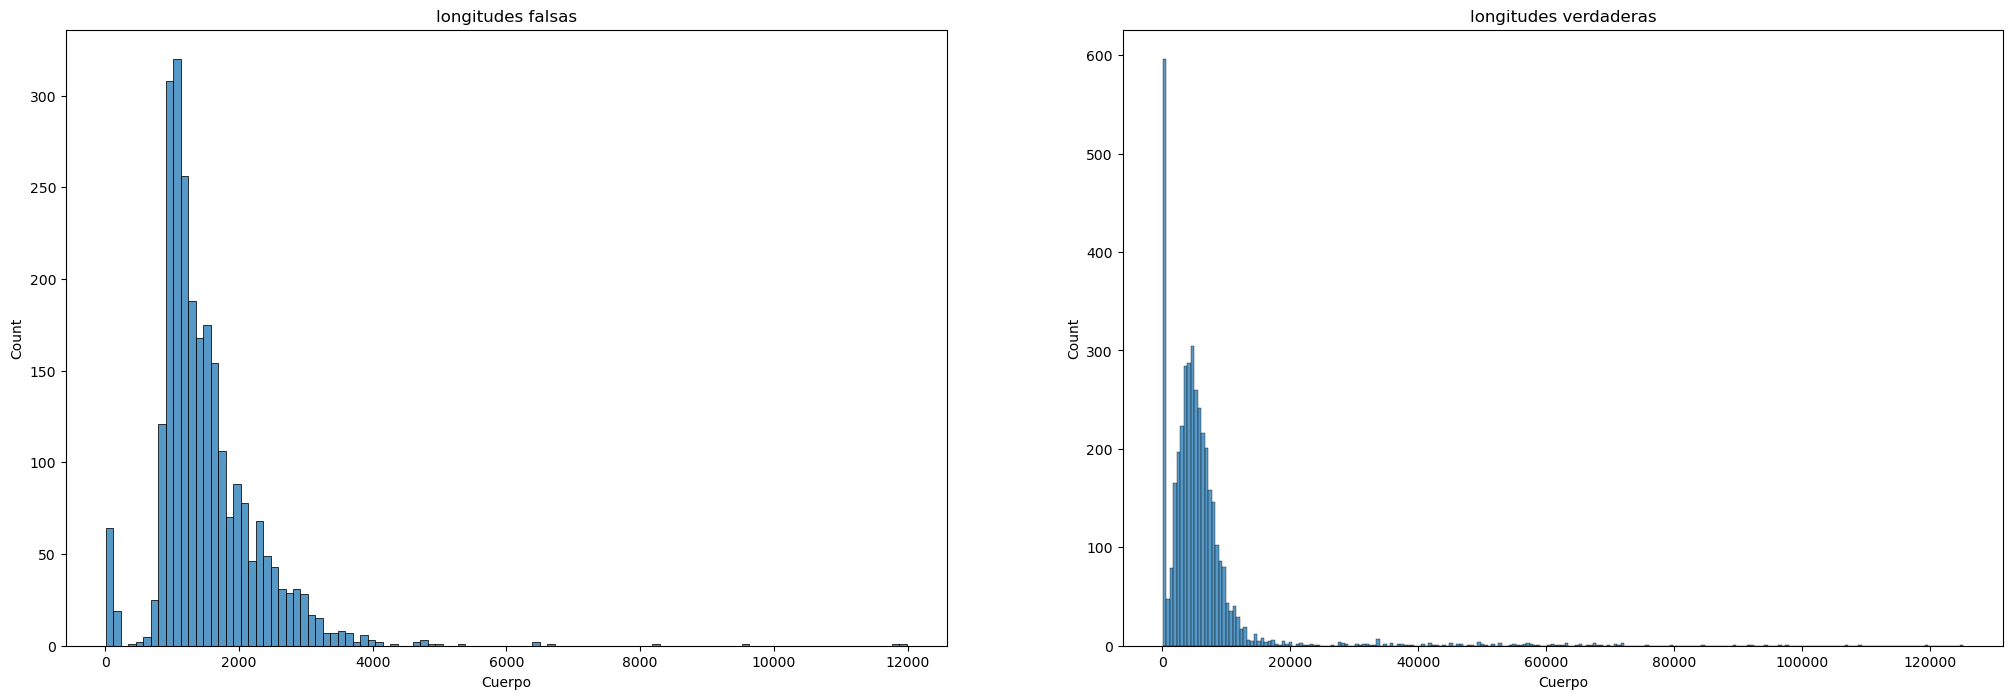

In [23]:
long_v = verdaderas.Cuerpo.str.len()
long_f = falsas.Cuerpo.str.len()

figure, axis = plt.subplots(1, 2, figsize=(25, 8))

sns.histplot(long_f, ax = axis[0])
axis[0].set_title('longitudes falsas')

sns.histplot(long_v, ax = axis[1])
axis[1].set_title('longitudes verdaderas')

plt.show()

In [24]:
print('Algunos datos sobre longitudes de Falsas y Verdaderas \n')
print('Por encima de los 4000 caracteres: ', (long_f[long_f > 4000].count(), long_v[long_v < 4000].count()))
print('En proporciones: ', (21/len(long_f), 2479/len(long_v)))
print('Coeficientes de variación: ', (long_f.std()/long_f.mean() , long_v.std()/long_v.mean()))

Algunos datos sobre longitudes de Falsas y Verdaderas 

Por encima de los 4000 caracteres:  (18, 1629)
En proporciones:  (0.008193523214982443, 0.6119476672426561)
Coeficientes de variación:  (0.5204792888945361, 1.505305876682012)


### Aunque no se aprecie tanto en los histogramas, la distribución de las longitudes de las noticias verdaderas presenta mucha mayor asimetría y dispersión.
#### 60% de las verdaderas por encima de los 4000 caracteres, mientras que ni el 1% de las falsas lo hacen
#### También se observa mucha mayor dispersión en las longitudes de las verdaderas

### Eliminando noticias por encima de cierto valor:
#### - Cantidades más similares de un tipo y otro
#### - Longitudes medias mas parecidas
#### - Menor asimetría en la distribución de las longitudes de las verdaderas
#### - Menor diferencia en la dispersion de ambas longitudes

In [25]:
totales = pd.concat([verdaderas_limpio, falsas]).reset_index(drop = True)

In [26]:
descartadas = totales[((totales.Cuerpo.str.len() < 200) == True) | ((totales.Cuerpo.str.len() > 6000) == True)]

In [27]:
totales_limpio = totales.drop(descartadas.index).reset_index(drop=True)
print(len(totales_limpio[totales_limpio.Target == 0]))
print(len(totales_limpio[totales_limpio.Target == 1]))

2615
2473


## Repito el analisis tras la limpieza

In [28]:
verdaderas = totales_limpio[totales_limpio.Target == 0]
falsas = totales_limpio[totales_limpio.Target == 1]

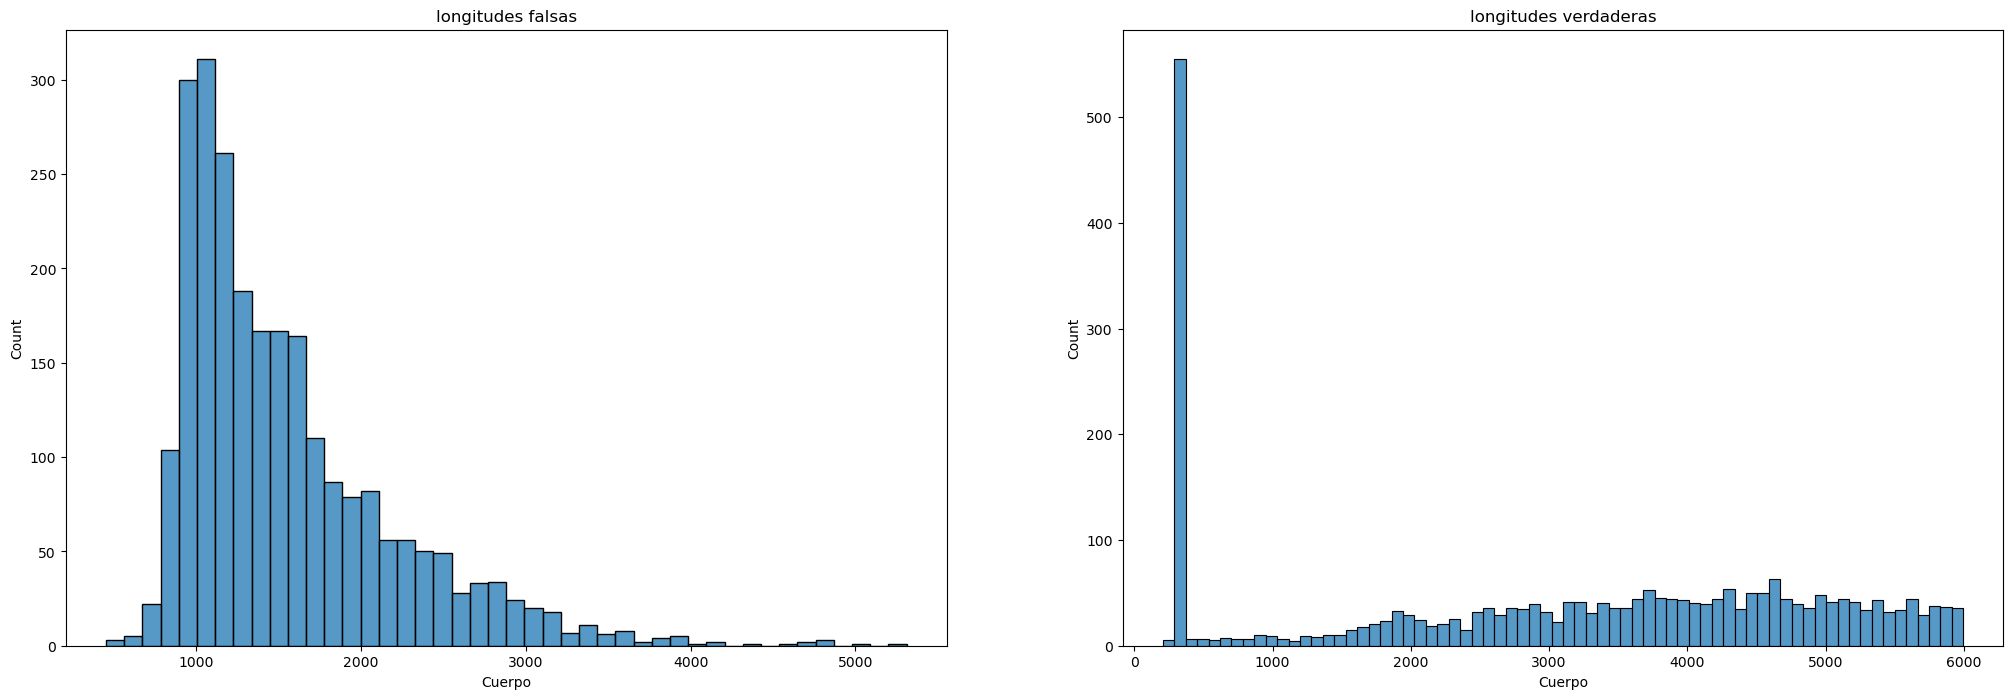

In [29]:
long_v = verdaderas.Cuerpo.str.len()
long_f = falsas.Cuerpo.str.len()

figure, axis = plt.subplots(1, 2, figsize=(25, 8))

sns.histplot(long_f, ax = axis[0])
axis[0].set_title('longitudes falsas')

sns.histplot(long_v, ax = axis[1], bins = 70)
axis[1].set_title('longitudes verdaderas')

plt.show()

# se observa algo raro en las noticias verdaderas de una longitud aproximada de 400
# tantas con una longitud tan concreta indica que probablemente formen algun tipo de grupo con características comunes

In [30]:
# VEAMOS DE FORMA ALEATORIA UNAS CUANTAS

cortas = verdaderas[(verdaderas.Cuerpo.str.len() < 500) == True].reset_index(drop = True)

i = np.random.randint(len(cortas))
print(len(cortas.Cuerpo.iloc[i]))
cortas.Cuerpo.iloc[i]

362


'Cada día desde hace tres semanas, de la mañana a la noche, un grupo de unos 20-30 hombres ocupa de forma contumaz una esquina de la calle Frankivska, en Leópolis, a dos minutos de la impresionante Casa de la Ópera. La mayor parte de ellos son jóvenesHazte Premium desde 1€ el primer mes Aprovecha esta oferta por tiempo limitado y accede a todo el contenido web\n'

In [31]:
# en la mayoría se repite al final el mensaje "Hazte Premium desde 1€ el primer mes Aprovecha esta oferta por tiempo limitado y accede a todo el contenido web\n"
# habia pensado eliminarlas directamete pero son mas de 560, me parecen muchas

#  * * * *  ACTUALIZACION: FINALMENTE LAS BORRAMOS 
#  POR LO QUE LAS CELDAS SIGUIENTES A LA PROXIMA QUEDAN SIMPLEMENTE COMENTADAS  * * * * 

In [32]:
descartar = verdaderas[(verdaderas.Cuerpo.str.len() < 500) == True].index
# se podria afinar un poco mas para tirar justo las que tengan ese formato, pero tampoco mucho (ver celda siguiente)

verdaderas = verdaderas.drop(descartar).reset_index(drop = True)

In [33]:
# indices = cortas.Cuerpo.str.find('Hazte Premium')
# print(f'Aparece en {(indices != -1).sum()} noticias de las {len(cortas)} que estamos analizando')

In [34]:
# indices

# es raro que el "Hazte Premium..." empiece tantas veces en el mismo punto

In [35]:
# cortas.Cuerpo[:7]

# Sin embargo sí parecen distintas

In [36]:
# print(len(cortas.Cuerpo.iloc[0]))
# cortas['Cuerpo'] = cortas.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)
# print(len(cortas.Cuerpo.iloc[0]))

In [37]:
# indices_cortas = verdaderas[(verdaderas.Cuerpo.str.len() < 500) == True].index
# verdaderas = pd.concat([verdaderas.drop(indices_cortas).reset_index(drop = True), cortas]).reset_index(drop = True)

#  ya limpio del todo

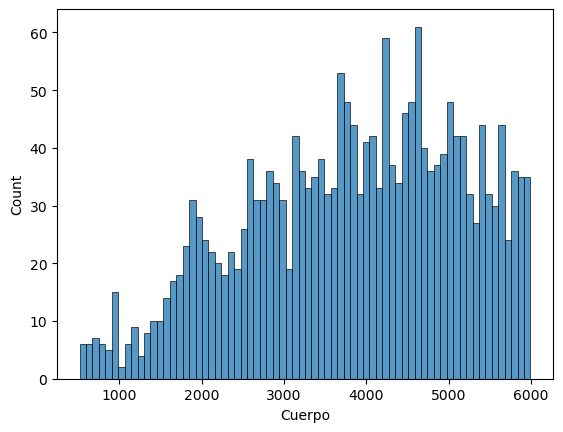

In [38]:
long_v = verdaderas.Cuerpo.str.len()
sns.histplot(long_v, bins = 70)
plt.show()

#  * * * * LA DISTRIBUCIÓN DE LAS LONGITUDES DE LAS VERDADERAS YA TIENE OTRO ASPECTO ! * * * * 

In [39]:
totales_limpisimo = pd.concat([verdaderas, falsas]).reset_index(drop = True)

In [40]:
#  * * * *  ACTUALIZACION: QUITO LOS CEROS  * * * * 

eliminar = ['000', '00']
totales_limpisimo['Cuerpo'] = totales_limpisimo['Cuerpo'].replace(eliminar, '', regex=True)

In [41]:
# totales_limpisimo.to_csv('dataset_final.csv', index = False)

#  * * * * GUARDO EL ACTUALIZADO * * * *
totales_limpisimo.to_csv('dataset_final_actualizacion1_mayus.csv', index = False)

In [42]:
totales_limpisimo

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target
0,ElDiario.es,https://www.eldiario.es/politica/pp-recupera-l...,2023-07-11,El PP se recupera ligeramente pero sigue sin o...,La estimación de escaños no se mueve en la enc...,El partido popular se recupera muy ligeramente...,politica,0
1,ElDiario.es,https://www.eldiario.es/politica/58-ciudadanos...,2023-07-11,Un 58% de los ciudadanos critican los pactos c...,"El 17,8% de quienes apuestan por Feijóo ven “m...",El PP ha necesitado a Vox para recuperar buena...,politica,0
2,ElDiario.es,https://www.eldiario.es/politica/diputado-ayus...,2023-07-11,Un diputado de Ayuso reúne a un grupo de vícti...,Daniel Portero trata con urgencia de contrarre...,El diputado del PP en la Asamblea de Madrid Da...,politica,0
3,ElDiario.es,https://www.eldiario.es/andalucia/almeria/psoe...,2023-07-11,El PSOE de Mójacar recurre ante el Constitucio...,"Ya con nuevo alcalde del PP, los socialistas r...",Mojácar retomó el ritmo político con la procla...,andalucia,0
4,ElDiario.es,https://www.eldiario.es/castilla-la-mancha/pol...,2023-07-11,La exalcaldesa de Toledo pide a Feijóo que fir...,"La socialista, también número dos al Congreso,...",La exalcaldesa de Toledo y 'número dos' de la ...,castilla-la-mancha,0
...,...,...,...,...,...,...,...,...
4514,HayNoticia.es,https://haynoticia.es/una-empresa-catalana-tri...,2018-11-06,Una empresa catalana triunfa con su papel higi...,NaN,La empresa catalana Banys Nous de Barcelona es...,curiosidades,1
4515,HayNoticia.es,https://haynoticia.es/hospitalizado-tras-inten...,2018-10-31,Hospitalizado tras intentar sacarse una muela ...,NaN,Sucedió el pasado lunes poco después de las 20...,curiosidades,1
4516,HayNoticia.es,https://haynoticia.es/lleva-300-bolsas-de-plas...,2018-10-30,Lleva 300 bolsas de plástico a Mercadona para ...,NaN,Un joven ha sido noticia ayer tras presentarse...,curiosidades,1
4517,HayNoticia.es,https://haynoticia.es/la-dgt-multara-a-los-con...,2018-10-28,La DGT multará a los conductores que no hayan ...,NaN,Este domingo nos ha tocado hacer por segunda v...,curiosidades,1


# Análisis de palabras más frecuentes

In [43]:
#  * * * * en estas líneas habia codigo que era redundante con lo posterior 

In [44]:
#   lo borro para que esté todo mas claro * * * * 

In [45]:
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

stopwords = stopwords.words('spanish')

f_cuerpos = falsas.Cuerpo.values
vectorizer1 = CountVectorizer(stop_words = stopwords + ['si', 'según', 'tras'])
vectorizer1.fit(f_cuerpos)
f_vect = vectorizer1.transform(f_cuerpos)
palabras1 = vectorizer1.get_feature_names_out()

In [46]:
frecuencias_fal = f_vect.sum(axis=0)
frecuencias_fal = np.asarray(frecuencias_fal).ravel()

contador_fal = Counter(dict(zip(palabras1, frecuencias_fal)))

# Filtrar stopwords y palabras de longitud 1
mas_frec_fal = [(palabra, frecuencia) for palabra, frecuencia in contador_fal.most_common(10) if palabra not in stopwords and len(palabra) > 1]

In [47]:
frecuencias_fal = [frecuencia for _, frecuencia in mas_frec_fal]
palabras_fal = [palabra for palabra, _ in mas_frec_fal]

In [48]:
print(palabras_fal) 
print(frecuencias_fal)

['años', 'ser', 'ahora', 'así', 'sido', 'mañana', 'vez', 'dos', 'aunque', 'casa']
[1138, 1084, 937, 876, 824, 777, 765, 760, 721, 716]


In [49]:
# ahora vemos las frecuencias de las verdaderas:

In [50]:
v_cuerpos = verdaderas.Cuerpo.values
vectorizer2 = CountVectorizer(stop_words = stopwords + ['si', 'según', 'tras'])
vectorizer2.fit(v_cuerpos)
v_vect = vectorizer2.transform(v_cuerpos)
palabras2 = vectorizer2.get_feature_names_out()

In [51]:
frecuencias_ver = v_vect.sum(axis=0)
frecuencias_ver = np.asarray(frecuencias_ver).ravel()

contador_ver = Counter(dict(zip(palabras2, frecuencias_ver)))

# Filtrar stopwords y palabras de longitud 1
mas_frec_ver = [(palabra, frecuencia) for palabra, frecuencia in contador_ver.most_common(10) if palabra not in stopwords and len(palabra) > 1]

In [52]:
frecuencias_ver = [frecuencia for _, frecuencia in mas_frec_ver]
palabras_ver = [palabra for palabra, _ in mas_frec_ver]

In [53]:
print(palabras_ver) 
print(frecuencias_ver)

['años', 'dos', 'ser', 'año', 'país', 'después', 'ahora', 'parte', 'sido', 'madrid']
[2914, 2379, 1660, 1543, 1539, 1437, 1423, 1408, 1331, 1322]


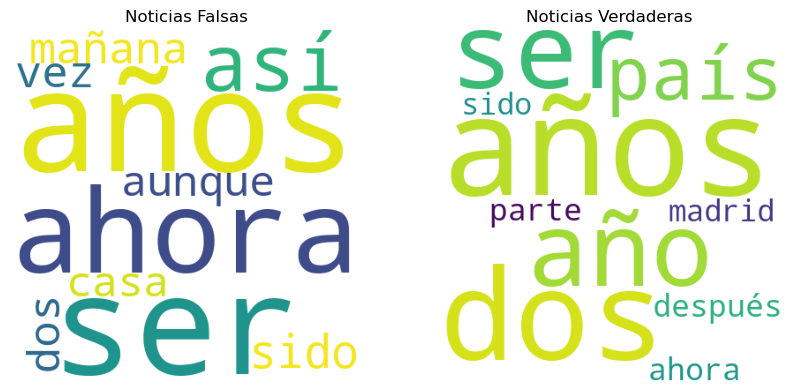

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_fal = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(zip(palabras_fal, frecuencias_fal)))
wordcloud_ver = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(zip(palabras_ver, frecuencias_ver)))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(wordcloud_fal)
axes[0].set_title('Noticias Falsas')
axes[0].axis('off')

axes[1].imshow(wordcloud_ver)
axes[1].set_title('Noticias Verdaderas')
axes[1].axis('off')

plt.show()